In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("zomato_reviews.csv")

In [5]:
df.head()

,review_id,rating,review_text,review_date,helpful
0,90749778-cd88-4c19-8b12-1fce7e7d82f8,4,kindly requesting to return change . we are fo...,2025-11-27 08:15:26,0
1,aa848bb6-d242-4a7e-831e-4f21e2e60c6e,1,"Hiked prices, packing and platform charges",2025-11-27 08:08:31,0
2,4f888388-9f28-44a4-8601-491a87035e53,5,good discount,2025-11-27 04:20:28,0
3,490a16b3-aacf-4204-bdcb-ffdbf04add72,1,"Zomato in its initial days was too good, but c...",2025-11-27 03:34:38,0
4,0090a503-13b8-4741-a7c0-42e811244563,5,good application,2025-11-27 02:50:58,0


In [6]:
df.isna().sum()

,0
review_id,0
rating,0
review_text,0
review_date,0
helpful,0


In [7]:
df[df.duplicated()]

,review_id,rating,review_text,review_date,helpful


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    20000 non-null  object
 1   rating       20000 non-null  int64 
 2   review_text  20000 non-null  object
 3   review_date  20000 non-null  object
 4   helpful      20000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 781.4+ KB


In [9]:
df.helpful.unique()


array([  0,   9,   5,   1,  22,   2,   3,  64,  11,   4,  65,  67,  21,
        94,  12,  13,  80,  68, 272,  69,   6, 131,  34,  60,  27,   8,
        49,   7, 120,  39,  43, 135, 214, 551,  23,  10, 357,  19, 199,
       228, 197,  20,  66,  18,  35,  45,  14, 125, 123, 128,  92, 477,
       158, 104,  98,  44,  72,  37, 133, 176,  25, 256, 137,  70, 118,
       154, 265,  16,  29,  48, 105,  17, 419, 288, 109, 175, 374,  40,
       188, 253, 548,  93, 100, 342,  33, 320, 708, 134, 279,  85, 139,
        15, 310, 149, 138, 148, 247,  51,  38,  24,  42,  73,  26])

In [10]:
df['review_date']=pd.to_datetime(df['review_date'])

In [11]:
df.helpful.median()

0.0

<Axes: >

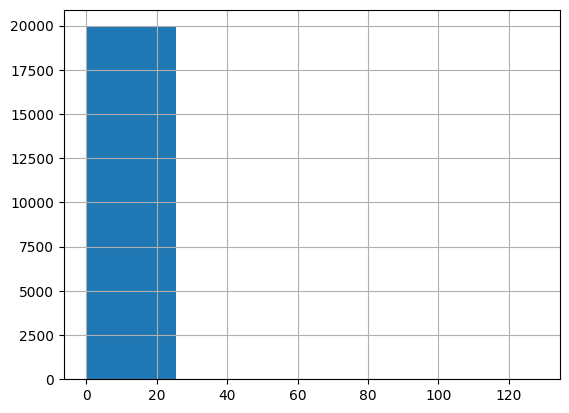

In [12]:
df[df.helpful <= 130].helpful.hist(bins=5)

<Axes: xlabel='rating', ylabel='count'>

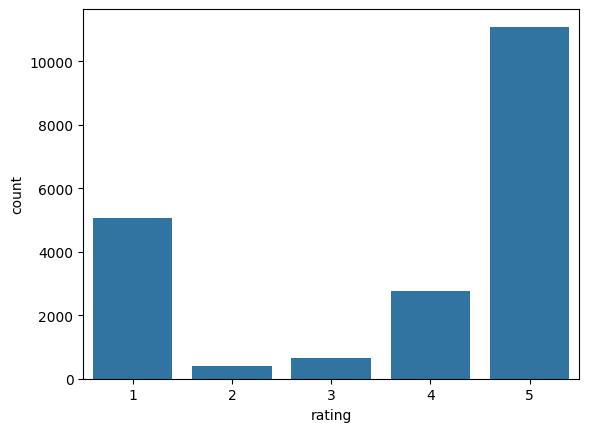

In [13]:
sns.countplot(x='rating',data=df)

In [14]:
df['is_helpful']=df.helpful.apply(lambda x:1 if x>0 else 0)

In [15]:
df

,review_id,rating,review_text,review_date,helpful,is_helpful
0,90749778-cd88-4c19-8b12-1fce7e7d82f8,4,kindly requesting to return change . we are fo...,2025-11-27 08:15:26,0,0
1,aa848bb6-d242-4a7e-831e-4f21e2e60c6e,1,"Hiked prices, packing and platform charges",2025-11-27 08:08:31,0,0
2,4f888388-9f28-44a4-8601-491a87035e53,5,good discount,2025-11-27 04:20:28,0,0
3,490a16b3-aacf-4204-bdcb-ffdbf04add72,1,"Zomato in its initial days was too good, but c...",2025-11-27 03:34:38,0,0
4,0090a503-13b8-4741-a7c0-42e811244563,5,good application,2025-11-27 02:50:58,0,0
...,...,...,...,...,...,...
19995,80a0c15b-9c25-4a5b-bd71-b9e1082dccf3,5,"super amazing refreshment for me, a great cup ...",2025-09-29 20:55:24,0,0
19996,c1c8e0cb-7d99-4792-b99a-60ef1852ff38,5,nice offer,2025-09-29 20:52:34,0,0
19997,3d0bc6d6-f6ae-42e7-b737-e22fc064f6b9,1,order gets cancelled after waiting more than o...,2025-09-29 20:51:30,0,0
19998,24cc239c-3784-402b-b28f-e81e3ff02d1f,5,wow delivery faster and cooperation with best ...,2025-09-29 20:49:10,0,0


In [16]:
X=df.drop(['review_id','review_date','helpful','is_helpful'],axis=1)
y=df['is_helpful']

In [17]:
X.shape,y.shape

((20000, 2), (20000,))

In [18]:
X.head()

,rating,review_text
0,4,kindly requesting to return change . we are fo...
1,1,"Hiked prices, packing and platform charges"
2,5,good discount
3,1,"Zomato in its initial days was too good, but c..."
4,5,good application


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from imblearn.pipeline import Pipeline # Use imblearn's Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# sm = SMOTE()
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


ColumnTransition=ColumnTransformer([
    ("cat",TfidfVectorizer(),'review_text'), # Simplified TfidfVectorizer
    ("num","passthrough",['rating'])
])

y_count0=y[y==0].sum()
y_count1=y[y==1].sum()
f=y_count0/y_count1


pipe=Pipeline([
    ("preprocess",ColumnTransition),
    ("model",LogisticRegression(class_weight={0:1,1:f}))
])

pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', TfidfVectorizer(),
                                                  'review_text'),
                                                 ('num', 'passthrough',
                                                  ['rating'])])),
                ('model',
                 LogisticRegression(class_weight={0: 1, 1: np.float64(0.0)}))])

In [20]:
#result by logistic regression
from sklearn.metrics import classification_report,confusion_matrix
y_pred=pipe.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3791
           1       0.00      0.00      0.00       209

    accuracy                           0.95      4000
   macro avg       0.47      0.50      0.49      4000
weighted avg       0.90      0.95      0.92      4000

[[3791    0]
 [ 209    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
#by the randomforestclassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline # Use imblearn's Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Removed: sm = SMOTE()
# Removed: X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


ColumnTransition=ColumnTransformer([
    ("cat",TfidfVectorizer(),'review_text'), # Simplified TfidfVectorizer
    ("num","passthrough",['rating'])
])


pipe=Pipeline([
    ("preprocess",ColumnTransition),
    ("sampling", SMOTE(random_state=42)), # Add SMOTE step after preprocessing
    ("model",RandomForestClassifier(random_state=42))
])

pipe.fit(X_train,y_train)
from sklearn.metrics import classification_report,confusion_matrix
y_pred=pipe.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3791
           1       0.38      0.27      0.32       209

    accuracy                           0.94      4000
   macro avg       0.67      0.62      0.64      4000
weighted avg       0.93      0.94      0.93      4000

[[3698   93]
 [ 152   57]]


In [22]:
#by xgboost classifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.pipeline import Pipeline # Use imblearn's Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)







ColumnTransition=ColumnTransformer([
    ("cat",TfidfVectorizer(),'review_text'), # Simplified TfidfVectorizer
    ("num","passthrough",['rating'])
])


pipe=Pipeline([
    ("preprocess",ColumnTransition),
    ("sampling", SMOTE(random_state=42)), # Add SMOTE step after preprocessing
    ("model",XGBClassifier())
])

pipe.fit(X_train,y_train)
#result by logistic regression
from sklearn.metrics import classification_report,confusion_matrix
y_pred=pipe.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3791
           1       0.36      0.27      0.31       209

    accuracy                           0.94      4000
   macro avg       0.66      0.62      0.64      4000
weighted avg       0.93      0.94      0.93      4000

[[3689  102]
 [ 152   57]]
